In [ ]:
pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

# **Data Exploration and Preprocessing**

In [ ]:
data = pd.read_csv('/content/creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
data.fillna(data.mean(), inplace=True)

In [ ]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
data.duplicated().sum()

1081

In [ ]:
data.drop_duplicates(inplace=True)

# **Exploratory Data Analysis - EDA**

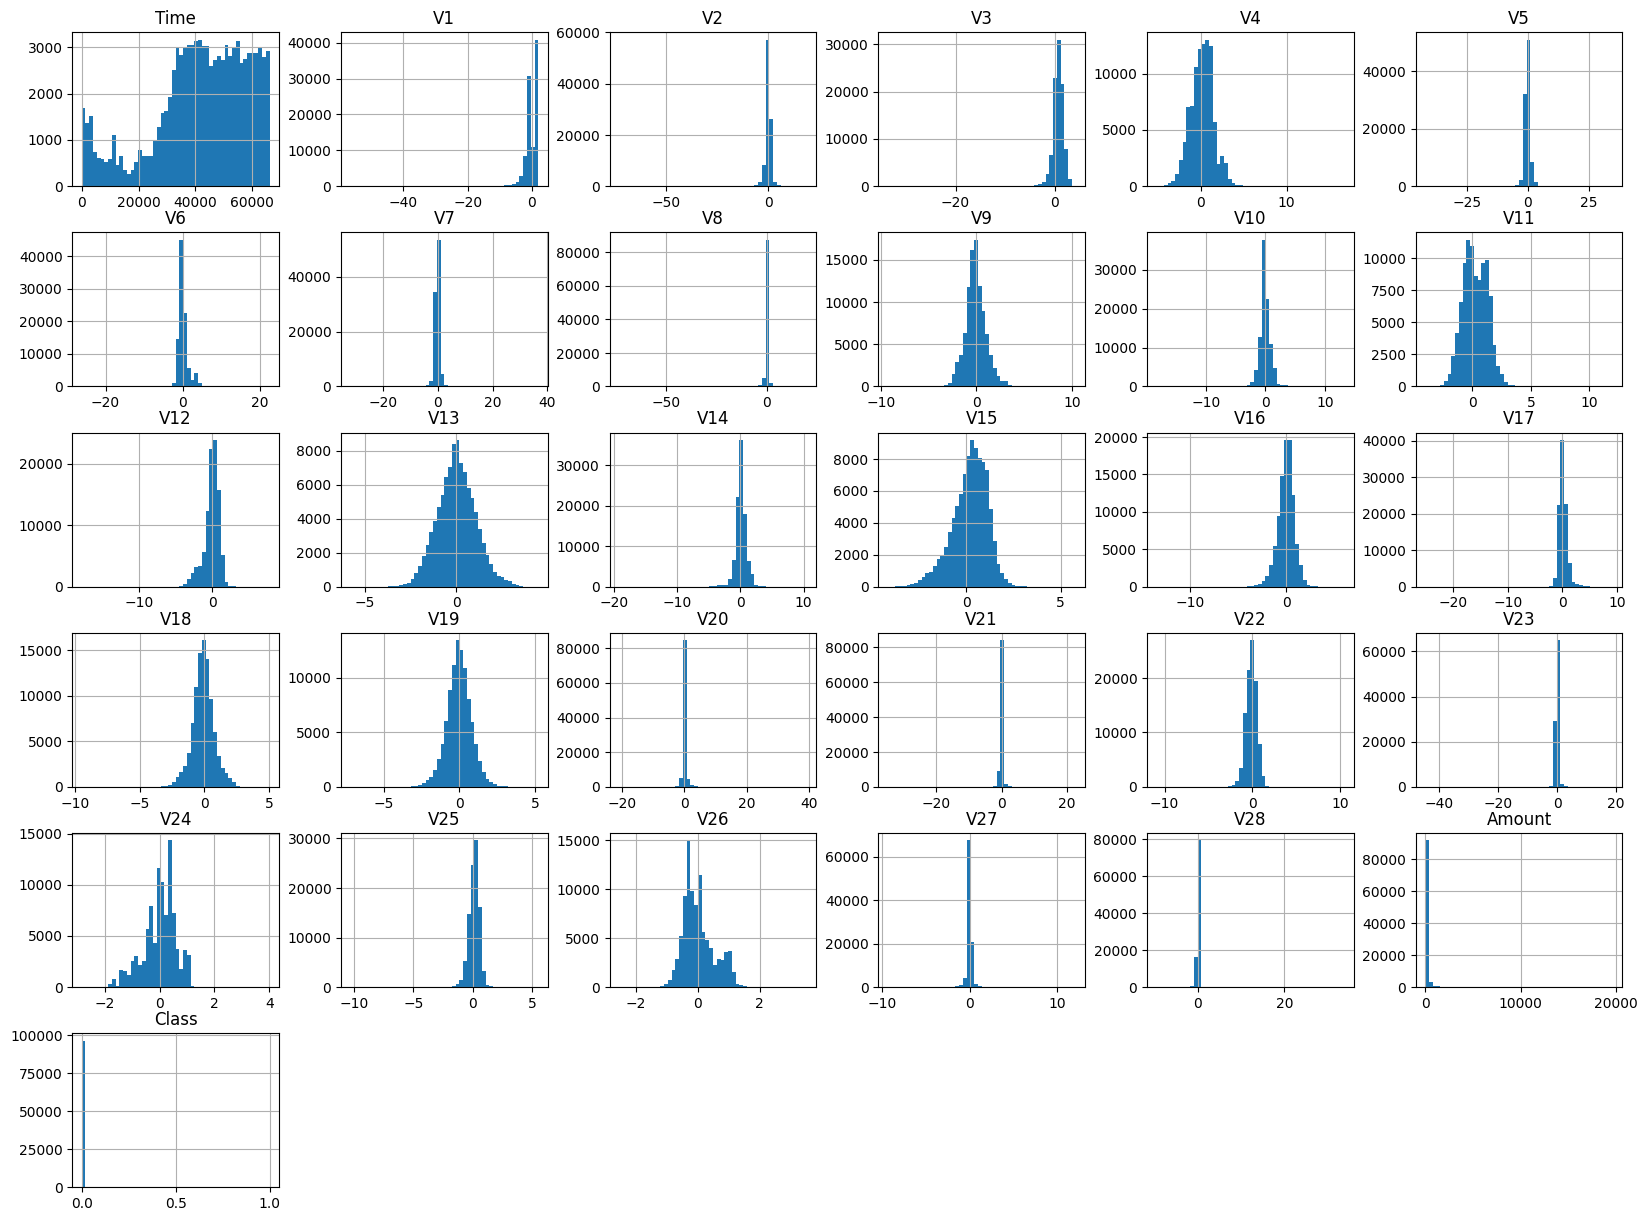

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

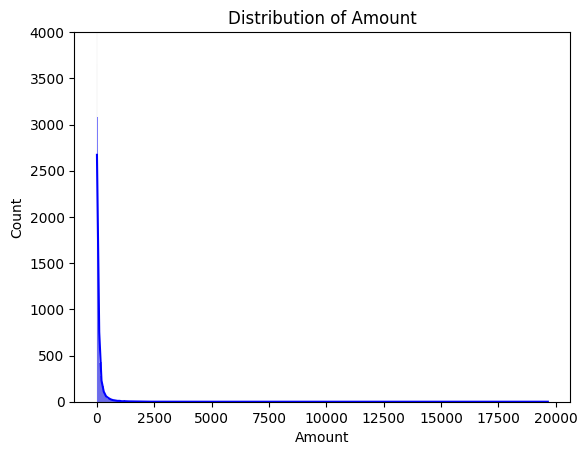

In [ ]:
sns.histplot(data['Amount'], kde=True, color='blue')
plt.title('Distribution of Amount')
plt.ylim(0, 4000)
plt.show()

*Boxplots*

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


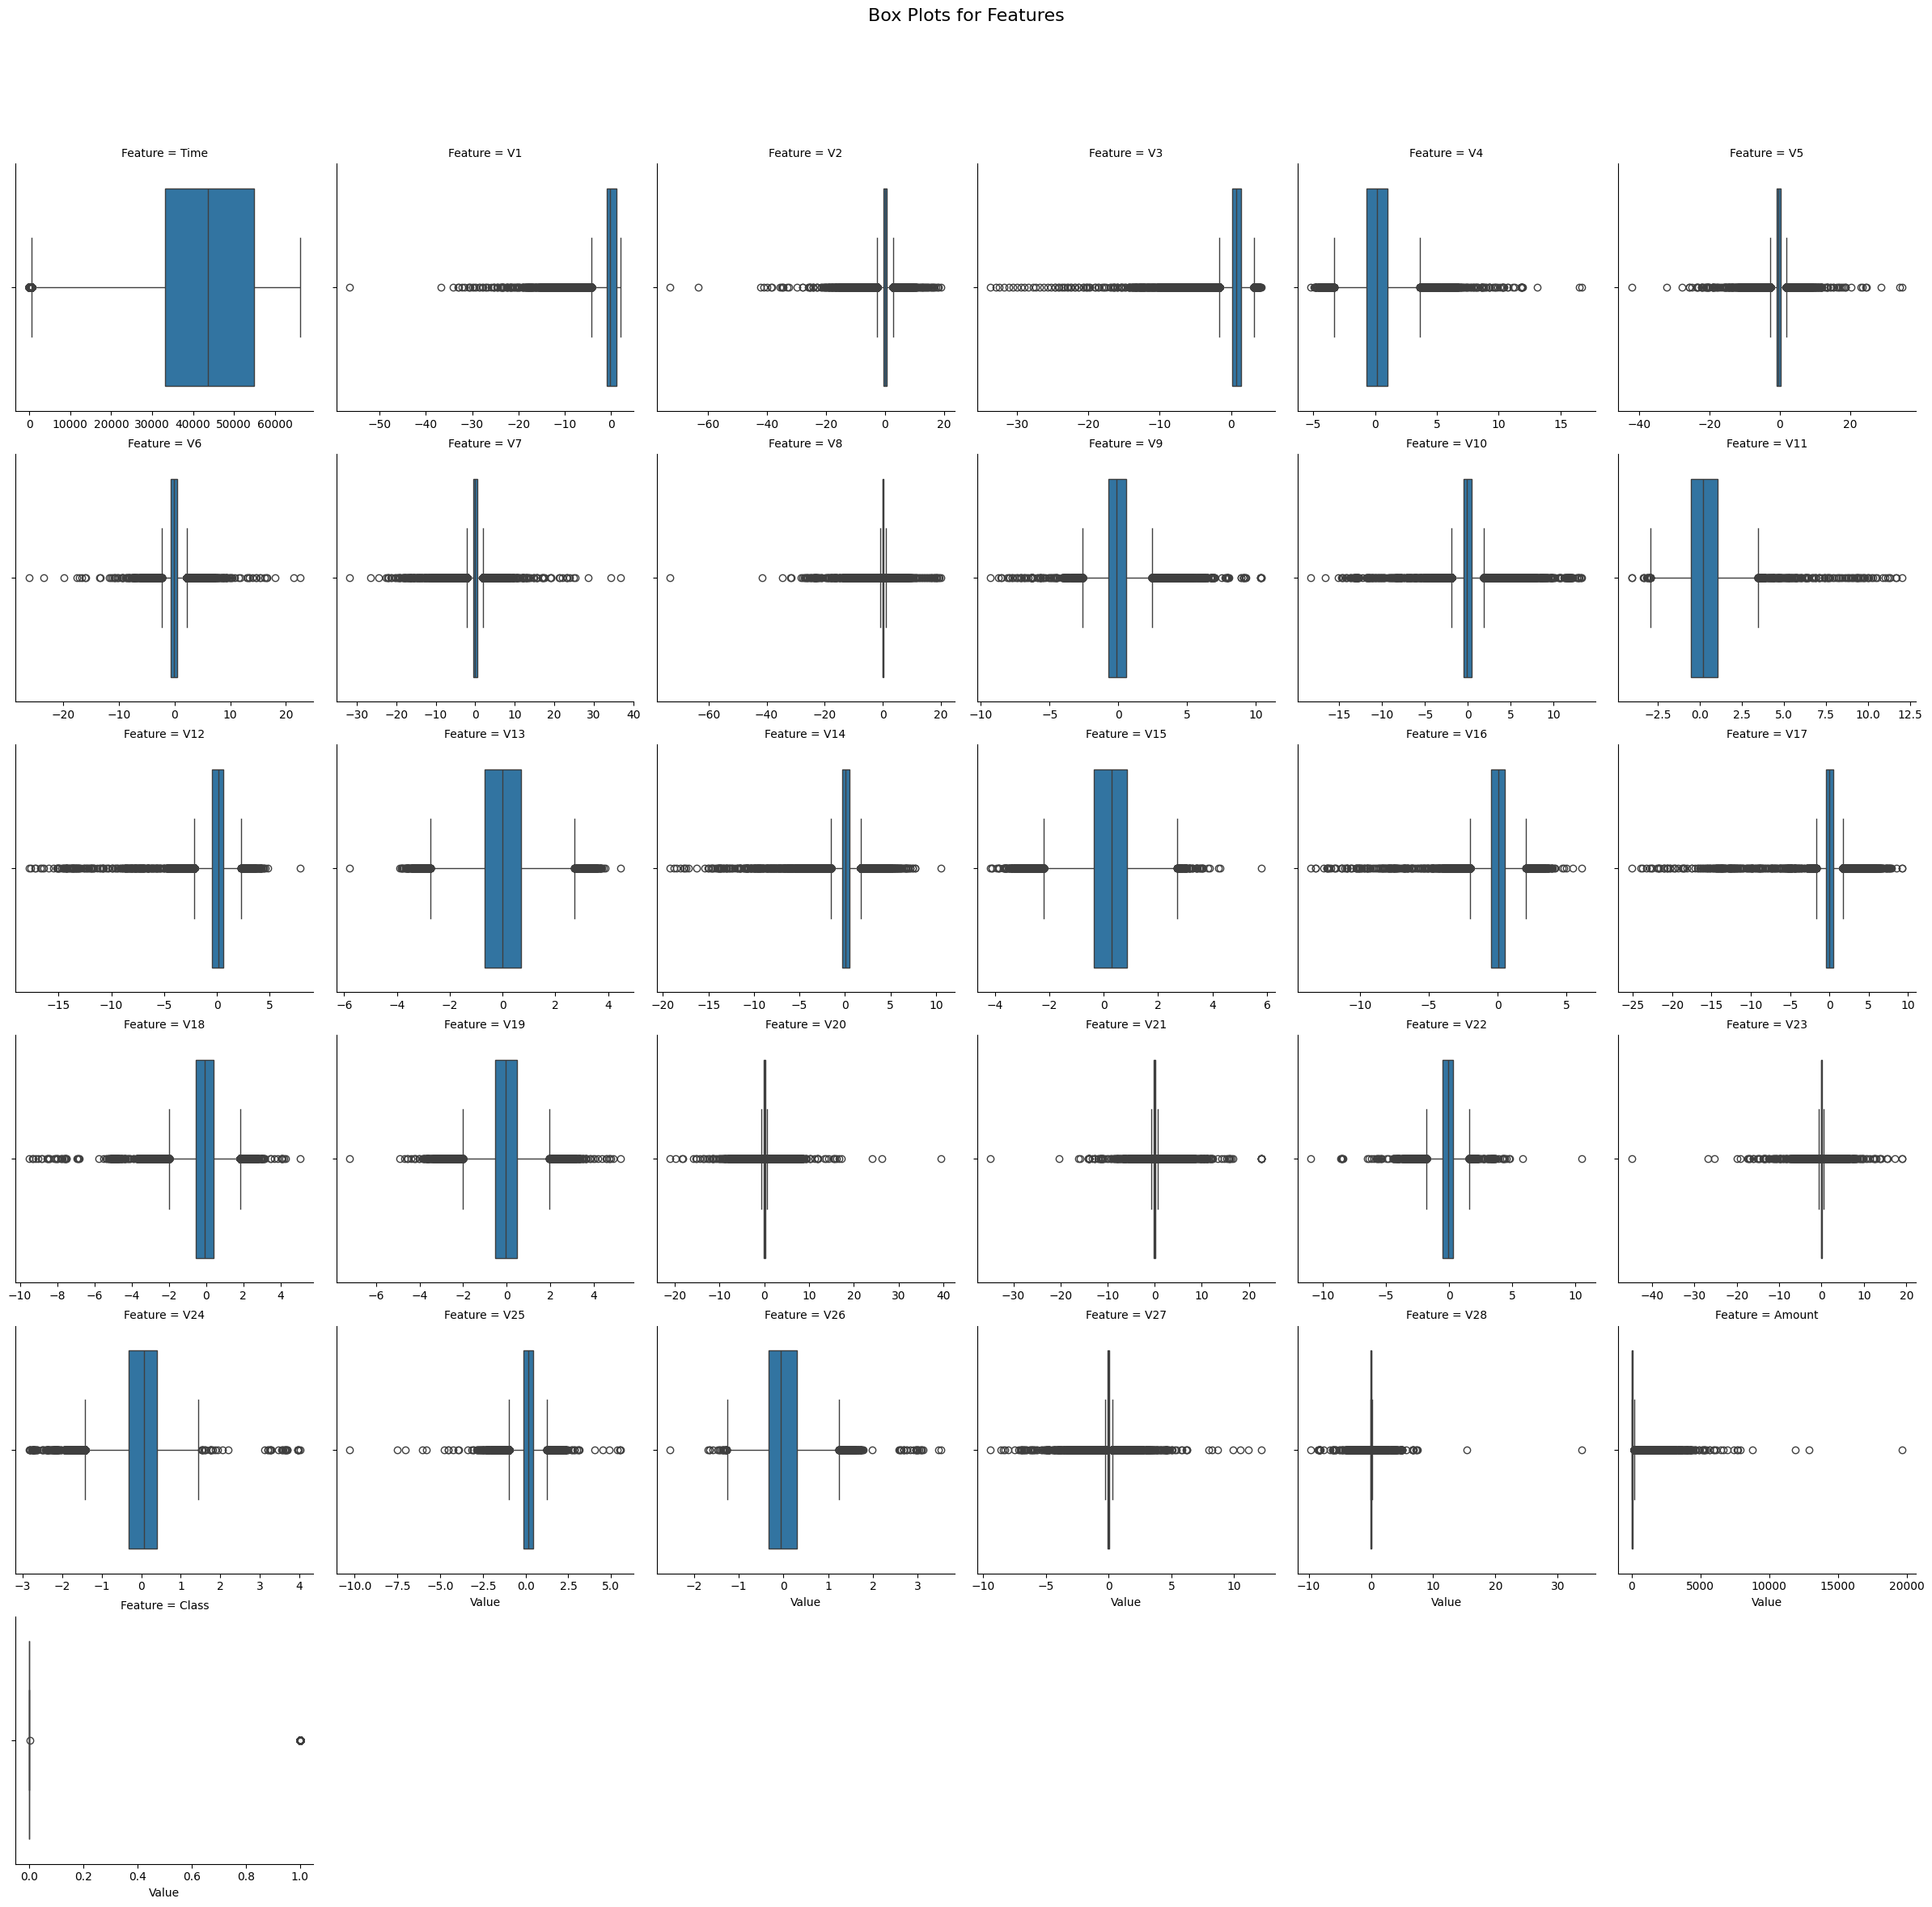

In [ ]:
col = data.columns
melted_data = data[col].melt(var_name='Feature', value_name='Value')
graph= sns.FacetGrid(melted_data, col="Feature", col_wrap=6, height=4, sharex=False, sharey=False)
graph.map(sns.boxplot, "Value")
graph.fig.subplots_adjust(top=0.9)
graph.fig.suptitle("Box Plots for Features", fontsize=16)
plt.show()

In [ ]:
data['Class'].value_counts()

,count
Class,
0,283253
1,473


*Scatter Plot*

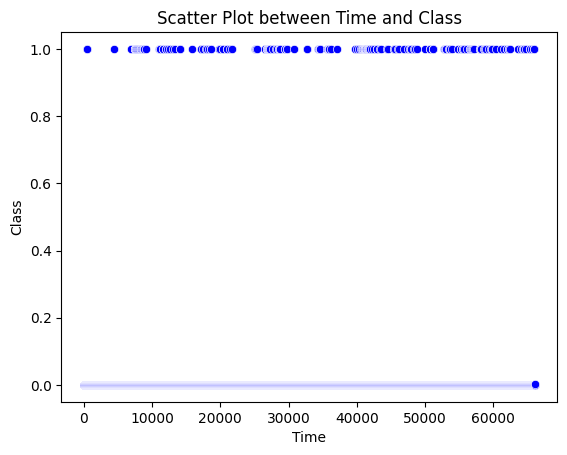

In [ ]:
sns.scatterplot(x=data['Time'], y=data['Class'], color='blue')
plt.title("Scatter Plot between Time and Class")
plt.xlabel("Time")
plt.ylabel("Class")
plt.show()

*Analyze the relationship between properties and Class*

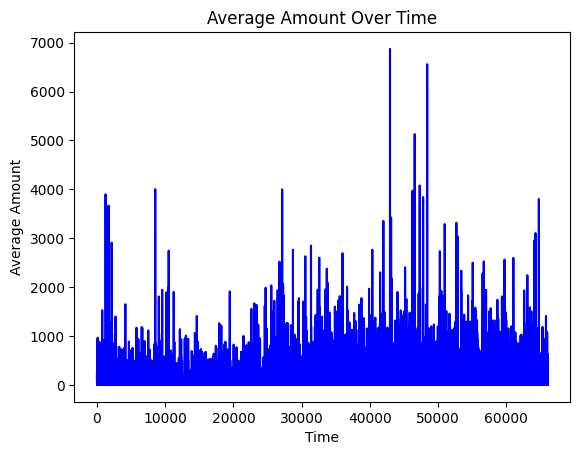

In [ ]:
data_grouped = data.groupby('Time')['Amount'].mean().reset_index()
sns.lineplot(x=data_grouped['Time'], y=data_grouped['Amount'], color='blue')
plt.title("Average Amount Over Time")
plt.xlabel("Time")
plt.ylabel("Average Amount")
plt.show()


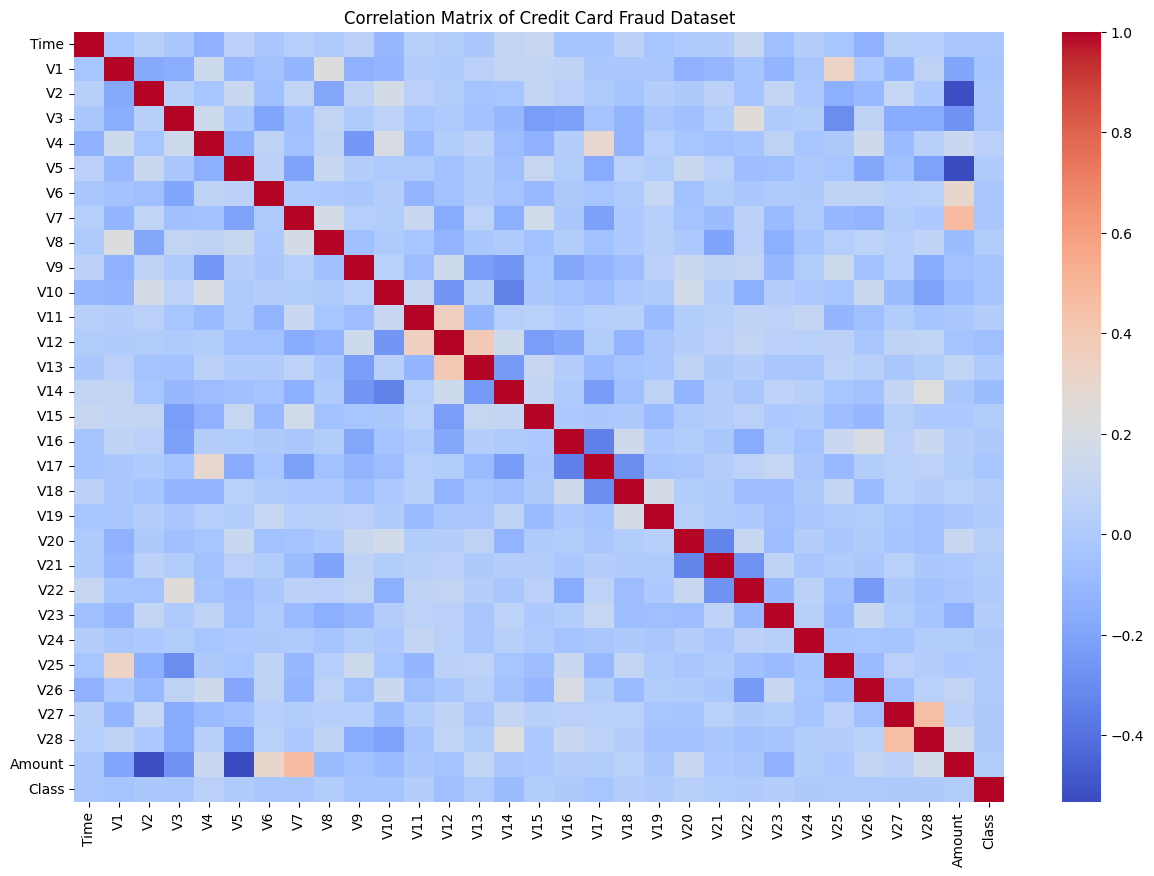

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Credit Card Fraud Dataset")
plt.show()

*Add new features*


*Calculate the normalization of amounts*

In [ ]:
data['Normalized_Amount'] = data['Amount'] / data['Amount'].max()

*Calculate categories of amounts, such as Small, Medium, and Large*

In [ ]:
bins = [0, 50, 200, 20000]
labels = ['Small', 'Medium', 'Large']
data['Amount_Bucket'] = pd.cut(data['Amount'], bins=bins, labels=labels)

*Calculate the interaction between Amount and Class*

In [ ]:
data['Amount_Class'] = data['Amount'] * data['Class']

In [ ]:
data['Class'] = data['Class'].astype(int)

In [ ]:
data['Class'].value_counts()

,count
Class,
0,283253
1,473


# **Implementation**

## SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

In [ ]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,Class,Normalized_Amount,Amount_Bucket,Amount_Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.005824,Medium,0.0,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.000105,Small,0.0,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.014739,Large,0.0,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.004807,Medium,0.0,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.002724,Medium,0.0,-0.073813


In [ ]:
X1 = data.iloc[:, data.columns != 'Class']
y1 = data.iloc[:, data.columns == 'Class']

In [ ]:
X1.info()


<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   V1                 283726 non-null  float64 
 1   V2                 283726 non-null  float64 
 2   V3                 283726 non-null  float64 
 3   V4                 283726 non-null  float64 
 4   V5                 283726 non-null  float64 
 5   V6                 283726 non-null  float64 
 6   V7                 283726 non-null  float64 
 7   V8                 283726 non-null  float64 
 8   V9                 283726 non-null  float64 
 9   V10                283726 non-null  float64 
 10  V11                283726 non-null  float64 
 11  V12                283726 non-null  float64 
 12  V13                283726 non-null  float64 
 13  V14                283726 non-null  float64 
 14  V15                283726 non-null  float64 
 15  V16                283726 non-null  flo

In [ ]:
y1.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [ ]:
y1.value_counts()

,count
Class,
0,283253
1,473


In [ ]:
X1.isna().sum()

,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [ ]:
y1.isna().sum()

,0
Class,0


In [ ]:
# Separate numeric and categorical columns
numeric_cols = X1.select_dtypes(include=['number']).columns
categorical_cols = X1.select_dtypes(include=['category', 'object']).columns

# Fill missing values
X1[numeric_cols] = X1[numeric_cols].fillna(value=X1[numeric_cols].mean())  # Fill numeric columns with mean
X1[categorical_cols] = X1[categorical_cols].fillna(value=X1[categorical_cols].mode().iloc[0])  # Fill categorical columns with mode

print(X1)


<ipython-input-117-207dc797409e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1[numeric_cols] = X1[numeric_cols].fillna(value=X1[numeric_cols].mean())  # Fill numeric columns with mean
<ipython-input-117-207dc797409e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1[categorical_cols] = X1[categorical_cols].fillna(value=X1[categorical_cols].mode().iloc[0])  # Fill categorical columns with mode


               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802 -11.881118  10.071785 -9.834783 -2.066656 -5.364473 -2.606837   
284803  -0.732789  -0.055080  2.035030 -0.738589  0.868229  1.058415   
284804   1.919565  -0.301254 -3.249640 -0.557828  2.630515  3.031260   
284805  -0.240440   0.530483  0.702510  0.689799 -0.377961  0.623708   
284806  -0.533413  -0.189733  0.703337 -0.506271 -0.012546 -0.649617   

              V7        V8        V9       V10  ...       V23       V24  \
0       0.239599  0.098698  0.363787  0.090794  ... -0.11047

In [ ]:
X1.drop(columns=['Amount_Bucket'])
X1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Normalized_Amount,Amount_Bucket,Amount_Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.005824,Medium,0.0,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.000105,Small,0.0,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.014739,Large,0.0,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.004807,Medium,0.0,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.002724,Medium,0.0,-0.073813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.000030,Small,0.0,-0.350252
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.000965,Small,0.0,-0.254325
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.002642,Medium,0.0,-0.082239
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0.000389,Small,0.0,-0.313391


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
X_train.drop(columns=['Amount_Bucket'])

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Normalized_Amount,Amount_Class,normalizedAmount
79119,-1.353894,-1.081034,1.787587,-1.803254,-0.235223,2.177295,1.014795,0.549627,0.629906,-1.488768,...,0.367052,0.805029,-0.981966,-0.783392,0.905245,-0.176870,-0.093081,0.012378,0.0,0.916646
265736,-0.059936,0.582525,-1.369698,-1.100370,3.707608,3.396709,1.218666,0.541196,-0.507983,-0.419227,...,0.311566,-0.268906,0.690685,0.463247,-0.637914,-0.121454,-0.196513,0.001297,0.0,-0.220259
42801,-0.362164,0.715165,1.783253,0.230848,-0.240500,-0.508633,0.589763,-0.013746,-0.048097,-0.668365,...,-0.515372,-0.044853,0.385330,-0.126762,0.139889,0.031010,0.057977,0.000778,0.0,-0.273494
172689,-0.370982,0.446004,-0.732017,-1.088288,1.799175,-1.117223,1.502962,-0.553382,-0.240976,-0.167418,...,0.937860,-0.198459,0.728053,0.203829,-0.522782,-0.376116,-0.103404,0.000245,0.0,-0.328167
179949,0.695644,0.177228,0.481414,-0.338853,-0.122807,0.074431,-0.509006,-0.775719,0.982836,-0.657858,...,0.468104,-0.195806,0.709315,0.487912,-0.246186,0.196872,0.197452,0.000389,0.0,-0.313431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120348,-0.188193,-3.244306,-1.083455,0.136170,-1.626809,-0.517792,0.786109,-0.401554,-0.642671,0.274674,...,-1.341362,-0.791988,-0.064471,0.141139,1.038062,-0.238098,0.136452,0.033062,0.0,3.038859
260136,0.149260,0.988698,-0.605170,-0.788264,1.238822,-0.203064,0.861209,0.067349,-0.279204,-0.664895,...,-0.816542,0.008957,-0.010456,-0.377837,0.128193,0.219217,0.068558,0.000035,0.0,-0.349773
132427,1.259310,-0.049484,-0.721776,0.071903,1.864771,3.635628,-0.821682,0.929256,0.128685,0.094031,...,0.104264,-0.107993,1.004823,0.674600,-0.275199,0.045933,0.025074,0.000175,0.0,-0.335356
147428,1.982903,-0.134427,-1.161183,0.472515,-0.043755,-1.080473,0.306983,-0.373167,0.454594,0.008851,...,-0.472417,0.248672,0.025584,-0.195097,0.272711,-0.071660,-0.055715,0.001537,0.0,-0.195658


In [ ]:


X1.drop(columns=['Amount_Bucket'], inplace=True, errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

print("Class distribution in y_train before SMOTE:", Counter(y_train['Class']))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train['Class'])

print("Class distribution in y_train after SMOTE:", Counter(y_train_resampled))

<ipython-input-128-109777458b9f>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1.drop(columns=['Amount_Bucket'], inplace=True, errors='ignore') # Use inplace and ignore errors for columns that might not exist


Class distribution in y_train before SMOTE: Counter({0: 226597, 1: 383})
Class distribution in y_train after SMOTE: Counter({0: 226597, 1: 226597})


*Smote*

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train.value_counts())

Before SMOTE: Class
0        226597
1           383
Name: count, dtype: int64
After SMOTE: Class
0        226597
1           383
Name: count, dtype: int64


In [ ]:
for column in data.select_dtypes(include=np.number).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply filtering only to Class 0
    data = data[~((data[column] < lower_bound) | (data[column] > upper_bound)) | (data['Class'] == 1)]


In [ ]:
data['Class'].value_counts()

,count
Class,
0,40115


# **Model Implementation**

### *** KNN Model***

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=15)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [ ]:
print(f"Accuracy: {acc}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.9973650219581504
F1 Score: 0.0
Recall: 0.0
ROC AUC Score: 0.5


### *Logistic Regression Model*

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler

# Install imbalanced-learn if not already installed
!pip install imbalanced-learn

In [ ]:
# Load the dataset
data = pd.read_csv('/content/creditcard.csv')

X1 = data.iloc[:, data.columns != 'Class']
y1 = data.iloc[:, data.columns == 'Class']

In [ ]:
X1.drop(columns=['Amount_Bucket'], inplace=True, errors='ignore')


<ipython-input-140-8ded1547267a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X1.drop(columns=['Amount_Bucket'], inplace=True, errors='ignore')


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:


# Check class distribution before undersampling
print("Class distribution in y_train before undersampling:", Counter(y_train['Class']))


Class distribution in y_train before undersampling: Counter({0: 227451, 1: 394})


In [ ]:
# Apply RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train['Class'])

In [ ]:



# Check class distribution after undersampling
print("Class distribution in y_train after undersampling:", Counter(y_train_undersampled))


Class distribution in y_train after undersampling: Counter({0: 394, 1: 394})


In [ ]:
model = LogisticRegression()
model.fit(X_train_undersampled, y_train_undersampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
accuracy_logistic = accuracy_score(y_test, y_pred)
precision_logistic  = precision_score(y_test, y_pred)
recall_logistic  = recall_score(y_test, y_pred)
f1_logistic  = f1_score(y_test, y_pred)
roc_auc_logistic = roc_auc_score(y_test, y_pred)

In [ ]:
print(f"Logistic Regression Accuracy: {accuracy_logistic }")
print(f"Logistic Regression Precision: {precision_logistic }")
print(f"Logistic Regression Recall: {recall_logistic }")
print(f"Logistic Regression F1 Score: {f1_logistic }")
print(f"Logistic Regression ROC AUC Score: {roc_auc_logistic}")

Logistic Regression Accuracy: 0.9572170920964854
Logistic Regression Precision: 0.03609678698928996
Logistic Regression Recall: 0.9285714285714286
Logistic Regression F1 Score: 0.06949217258495609
Logistic Regression ROC AUC Score: 0.9429189444489108


In [ ]:
results = []

results.append({
    "Model": "K-Nearest Neighbors (Regression)",
    "Accuracy": acc,
    "roc_auc": roc_auc,
    "Recall": recall,
    "F1-Score": f1,

})

results.append({
    "Model": "Logistic Regression",

    "Accuracy": accuracy_logistic,
    "Precision": precision_logistic,
    "Recall": recall_logistic,
    "F1-Score": f1_logistic,
    "roc_auc": roc_auc_logistic,
})

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,roc_auc,Recall,F1-Score,Precision
0,K-Nearest Neighbors (Regression),0.997365,0.500000,0.000000,0.000000,NaN
1,Logistic Regression,0.957217,0.942919,0.928571,0.069492,0.036097


*Compare the performance of different models and select the best-performing one.*

In [ ]:
best_classification_model = results_df[results_df["Accuracy"] != "NaN"].sort_values("F1-Score", ascending=False).iloc[0]
print("Best Classification Model:")
print(best_classification_model)

Best Classification Model:
Model        Logistic Regression
Accuracy                0.957217
roc_auc                 0.942919
Recall                  0.928571
F1-Score                0.069492
Precision               0.036097
Name: 1, dtype: object
